<a href="https://colab.research.google.com/github/paneri11/Indian-Census-ML-Dashboard/blob/main/DS_ESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [8]:
df = pd.read_csv('/content/Boston.csv')
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [9]:
print("\n--- DataFrame Info ---\n")
df.info()


--- DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [10]:
print("\n--- Missing Values ---\n")
print(df.isnull().sum())


--- Missing Values ---

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


In [11]:
print("\n--- Descriptive Statistics ---\n")
print(df.describe())


--- Descriptive Statistics ---

       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.4555

In [13]:
X = df['lstat'].values.reshape(-1, 1)
y = df['medv'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (404, 1)
X_test shape: (102, 1)
y_train shape: (404,)
y_test shape: (102,)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Model Intercept: {model.intercept_:.2f}")
print(f"Model Coefficient (LSTAT): {model.coef_[0]:.2f}")

Model Intercept: 34.84
Model Coefficient (LSTAT): -0.97


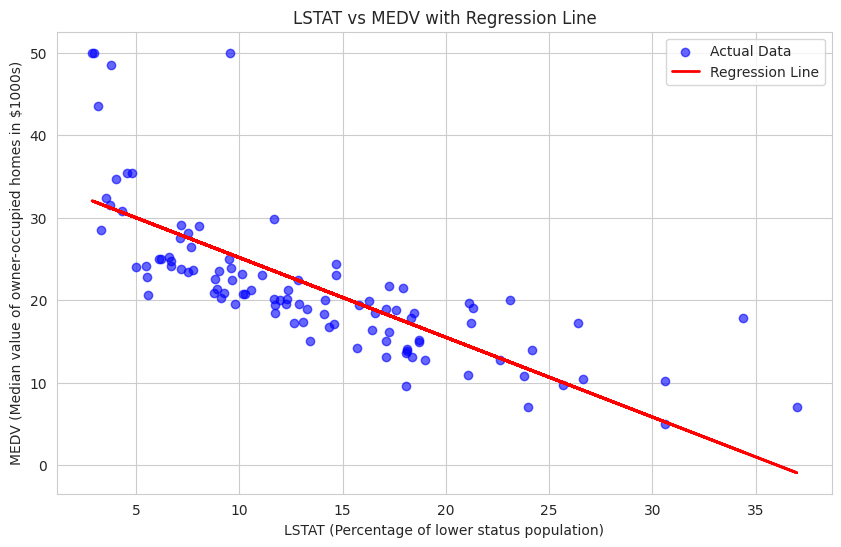

In [17]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data', alpha=0.6)

y_pred = model.predict(X_test)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('LSTAT vs MEDV with Regression Line')
plt.xlabel('LSTAT (Percentage of lower status population)')
plt.ylabel('MEDV (Median value of owner-occupied homes in $1000s)')
plt.legend()
plt.show()




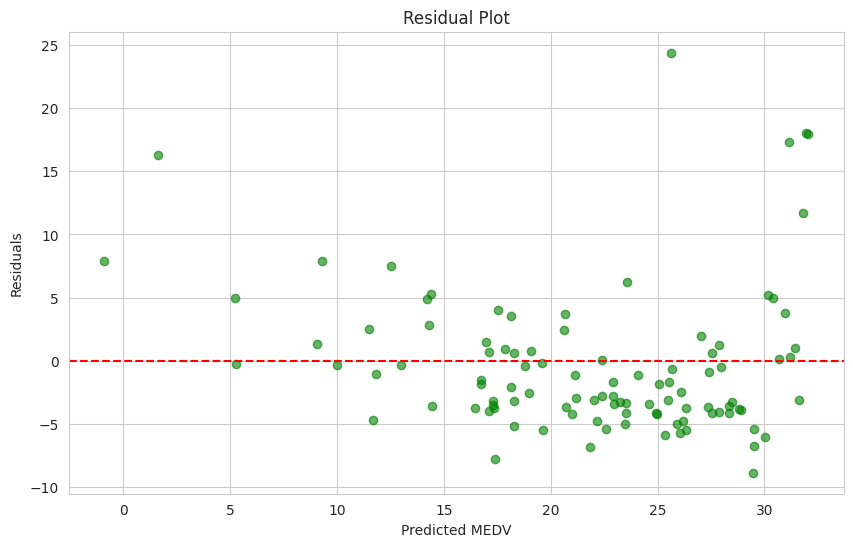

In [18]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residual Plot')
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.show()


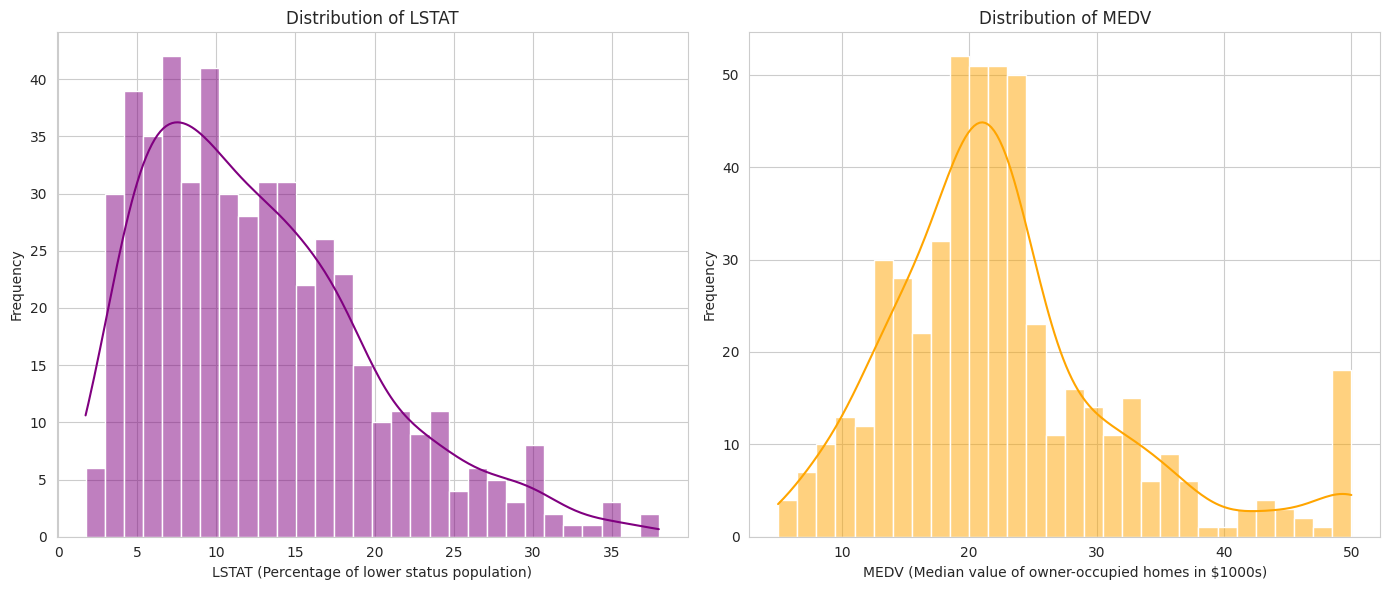

In [19]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['lstat'], bins=30, kde=True, color='purple')
plt.title('Distribution of LSTAT')
plt.xlabel('LSTAT (Percentage of lower status population)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['medv'], bins=30, kde=True, color='orange')
plt.title('Distribution of MEDV')
plt.xlabel('MEDV (Median value of owner-occupied homes in $1000s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
y_pred = model.predict(X_test)

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [22]:
print(f"\n--- Model Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")


--- Model Evaluation Metrics ---
Mean Absolute Error (MAE): 4.18
Mean Squared Error (MSE): 33.52
Root Mean Squared Error (RMSE): 5.79
R-squared (R^2): 0.54
